In [33]:
!pip install pyfim

In [34]:
!pip install paretoset

In [35]:
from fim import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from paretoset import paretoset
from mpl_toolkits.mplot3d import Axes3D

##**1.1. Reducción de dimensionalidad**

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/apoorva-21/fifa-analysis/master/data/players_20.csv', index_col=0)
df

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,20

a. (0.5 puntos) pre-procese el dataset (elimnando filas con na, solo tomando en cuenta filas numéricas)

In [37]:
print(df.dtypes)
print(df.shape)


player_url    object
short_name    object
long_name     object
age            int64
dob           object
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 103, dtype: object
(18278, 103)


In [38]:
df.select_dtypes(include = ["int"])

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,32,170,72,94,94,95500000,565000,5,4,4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
20801,34,187,83,93,93,58500000,405000,5,4,5,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
190871,27,175,68,92,92,105500000,290000,5,5,5,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
200389,26,188,87,91,93,77500000,125000,3,3,1,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
183277,28,175,74,91,91,90000000,470000,4,4,4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245006,22,186,79,48,56,40000,2000,1,3,2,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
250995,22,177,66,48,56,40000,2000,1,2,2,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
252332,19,186,75,48,56,40000,1000,1,2,2,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14


In [39]:
#df_num = df.dropna(subset=df.select_dtypes(float).columns, inplace=True, how='all')
df_num = df.select_dtypes(include = ["float",'int'])
df_num

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
190871,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
200389,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
183277,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245006,22,186,79,48,56,40000,2000,1,3,2,70000.0,36.0,2019.0,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
250995,22,177,66,48,56,40000,2000,1,2,2,72000.0,31.0,2022.0,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
252332,19,186,75,48,56,40000,1000,1,2,2,70000.0,38.0,2019.0,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14


In [40]:
df_num.isnull().sum()

age                               0
height_cm                         0
weight_kg                         0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
international_reputation          0
weak_foot                         0
skill_moves                       0
release_clause_eur             1298
team_jersey_number              240
contract_valid_until            240
nation_jersey_number          17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
attacking_crossing                0
attacking_finishing         

In [41]:
#quité estas columnas por su gran cantidad de NaNs
df_numfilt = df.drop(columns={'nation_jersey_number', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning' })
df_numfilt

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Acrobatic Clearance",13,11,15,43,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [42]:
print(df_numfilt.select_dtypes(include = ["float","int"]).isnull().sum())

age                              0
height_cm                        0
weight_kg                        0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
international_reputation         0
weak_foot                        0
skill_moves                      0
release_clause_eur            1298
team_jersey_number             240
contract_valid_until           240
pace                          2036
shooting                      2036
passing                       2036
dribbling                     2036
defending                     2036
physic                        2036
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control  

In [43]:
##df1 es el dataframe con sólo números y sin NaNs 
df1 = df_numfilt.select_dtypes(exclude='object').dropna()
df1

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
190871,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
183277,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
192985,28,181,70,91,91,90000000,370000,4,5,4,166500000.0,17.0,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243961,20,180,72,48,59,50000,1000,1,3,2,88000.0,19.0,2019.0,52.0,37.0,47.0,46.0,42.0,49.0,37,35,49,55,27,41,31,30,47,44,54,50,63,53,64,47,60,51,45,31,52,45,37,49,40,43,39,39,48,6,11,9,5,8
245006,22,186,79,48,56,40000,2000,1,3,2,70000.0,36.0,2019.0,57.0,23.0,28.0,33.0,47.0,51.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
250995,22,177,66,48,56,40000,2000,1,2,2,72000.0,31.0,2022.0,58.0,24.0,33.0,35.0,48.0,48.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9


In [44]:
df1.isnull().sum()

age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement

b. (0.5 puntos) calcule el valor de componentes para la varianza de 90%

In [45]:
#Normalizando los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [46]:
scaled_data = scaler.transform(df1)
scaled_data.shape

(15077, 53)

In [47]:
df1 = scaled_data
df1

array([[ 1.48828686, -1.62438054, -0.36600375, ...,  1.45503578,
         1.15351057, -0.811171  ],
       [ 1.9271166 ,  1.00972034,  1.27309177, ...,  1.45503578,
         1.15351057,  0.16556405],
       [ 0.39121249, -0.84964498, -0.96203849, ...,  1.45503578,
         1.48067636,  0.16556405],
       ...,
       [-0.70586188, -0.53975076, -1.26005586, ...,  1.13277508,
         0.17201321, -0.48559265],
       [-1.36410651,  0.85477323,  0.0810223 , ..., -0.15626769,
        -1.46381572,  1.14229911],
       [-1.58352138,  0.69982612, -0.06798639, ...,  0.81051439,
         0.82634479,  0.81672075]])

In [48]:
from sklearn.decomposition import PCA

#aplicando el PCA para reducir las dimensiones

pca = PCA(n_components=0.9 )

pca.fit(df1)
p_pca =pca.transform(df1)
var_cum=np.cumsum(pca.explained_variance_ratio_)*100
print(p_pca.shape)
print(pca.explained_variance_ratio_)
print(pca.components_)
print(var_cum)
#Cuantos PCs explican el 90% de los valores
k = np.argmax(var_cum >= 90) + 1
print('La cantidad de PCs que explican el 90% de varianza acumulada es ', k)

(15077, 20)
[0.31462744 0.17854383 0.07946771 0.0515542  0.04216989 0.02564134
 0.02324951 0.01900909 0.01786126 0.01763631 0.01741818 0.01717838
 0.0168614  0.01645345 0.01430583 0.01292142 0.01188412 0.01018551
 0.00935706 0.00811816]
[[ 0.0689824  -0.07989906 -0.04970158 ...  0.01171097  0.00782091
   0.00878286]
 [ 0.14181949  0.15499854  0.16712196 ...  0.01723177  0.01925966
   0.01410505]
 [ 0.11066844  0.27228364  0.28133292 ...  0.01888621  0.02109073
   0.0235142 ]
 ...
 [ 0.05566043 -0.15039507 -0.19391557 ... -0.038545    0.02372266
  -0.00137056]
 [-0.03278854  0.01539628  0.09851765 ... -0.01347405 -0.00561418
   0.00695432]
 [-0.14729113 -0.05815032  0.08993268 ...  0.03007875 -0.00851782
   0.02825866]]
[31.46274419 49.31712707 57.26389828 62.41931811 66.63630668 69.20044065
 71.5253912  73.42630034 75.21242584 76.97605723 78.71787564 80.43571371
 82.12185414 83.76719947 85.1977829  86.48992498 87.67833741 88.69688825
 89.63259403 90.44441015]
La cantidad de PCs que exp

c. (0.5 puntos) calcule el valor de componentes para la varianza de 95%

In [49]:
pca = PCA(n_components=0.95 )

pca.fit(df1)
p_pca =pca.transform(df1)
var_cum=np.cumsum(pca.explained_variance_ratio_)*100
print(p_pca.shape)
print(pca.explained_variance_ratio_)
print(pca.components_)
print(var_cum)
#Cuantos PCs explican el 95% de los valores
k = np.argmax(var_cum >= 95) + 1
print('La cantidad de PCs que explican el 95% de varianza acumulada es ', k)

(15077, 28)
[0.31462744 0.17854383 0.07946771 0.0515542  0.04216989 0.02564134
 0.02324951 0.01900909 0.01786126 0.01763631 0.01741818 0.01717838
 0.0168614  0.01645345 0.01430583 0.01292142 0.01188412 0.01018551
 0.00935706 0.00811816 0.00792115 0.00736528 0.00681919 0.00612403
 0.00559117 0.00536708 0.00480393 0.00456888]
[[ 0.0689824  -0.07989906 -0.04970158 ...  0.01171097  0.00782091
   0.00878286]
 [ 0.14181949  0.15499854  0.16712196 ...  0.01723177  0.01925966
   0.01410505]
 [ 0.11066844  0.27228364  0.28133292 ...  0.01888621  0.02109073
   0.0235142 ]
 ...
 [ 0.03495216 -0.28018016 -0.04261257 ...  0.02104768 -0.01540022
   0.00291652]
 [-0.02097777 -0.26991745 -0.03005053 ...  0.00646658 -0.00556599
  -0.00508861]
 [ 0.12248548  0.01149798 -0.12116167 ... -0.00048482  0.00484964
   0.00284535]]
[31.46274419 49.31712707 57.26389828 62.41931811 66.63630668 69.20044065
 71.5253912  73.42630034 75.21242584 76.97605723 78.71787564 80.43571371
 82.12185414 83.76719947 85.1977829 

d. (0.5 puntos) grafique la varianza acumulada para todos los valores de n_components_

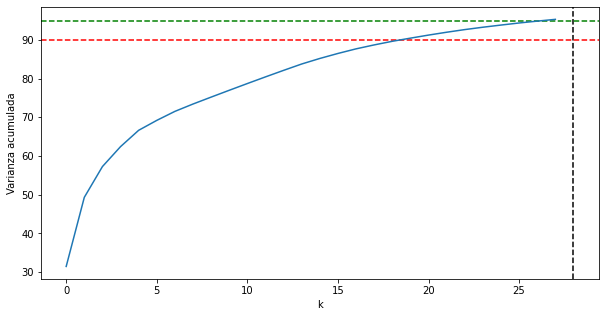

In [50]:
plt.figure(figsize=(10,5))
plt.axvline(x=k,color='black',linestyle='--') #línea de referencia usando K
plt.axhline(y=95,color='green',linestyle='--') #línea de referencia en varianza 95%
plt.axhline(y=90,color='red',linestyle='--') #línea de referencia en varianza 90%
plt.plot(var_cum)
plt.xlabel('k')
plt.ylabel('Varianza acumulada')
plt.show()

##1.2.1 Obtenga los Skylines (i,e., el frente Pareto) al dataset

a. (0.5 puntos) con respecto a las 5 primeras dimensiones.

In [51]:
pca_5 = PCA(n_components=5)
pca_5.fit(df1)

PCA(n_components=5)

In [52]:
pca_df_5 = pd.DataFrame(pca_5.transform(df1), columns=['PCA%i' % i for i in range(5)])

mask = paretoset(pca_df_5,sense=['max','max','max','max','max'])
sky_5 = pca_df_5[mask]
sky_5

,PCA0,PCA1,PCA2,PCA3,PCA4
0,22.822203,7.013908,2.105425,20.119568,12.888617
1,18.506620,6.169515,4.961618,14.185320,5.349551
4,18.892678,8.787019,1.193438,15.063090,10.240456
5,9.350282,12.574461,1.315644,13.590505,5.541695
10,15.397037,7.788655,5.115036,13.592792,6.553265
11,11.589348,9.584095,-3.207765,11.709941,5.516288
13,16.337579,3.905419,3.470033,11.873109,5.855141
15,16.100559,8.274020,5.098531,10.009767,4.849776
17,10.492162,12.085034,1.359200,9.785909,9.816421
18,17.728941,7.190889,1.428856,14.192174,7.534037


b. (0.5 puntos) con respecto a las 10 primeras dimensiones


In [53]:
pca_10 = PCA(n_components=10)
pca_10.fit(df1)

PCA(n_components=10)

In [54]:
pca_df_10 = pd.DataFrame(pca_10.transform(df1), columns=['PCA%i' % i for i in range(10)])
mask = paretoset(pca_df_10,sense=['max','max','max','max','max','max','max','max','max','max'])
sky_10 = pca_df_10[mask]
sky_10

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,22.822203,7.013908,2.105459,20.119684,12.890533,13.258446,-3.212656,-4.551664,1.383791,-1.232823
1,18.506620,6.169515,4.961613,14.185240,5.350147,8.790281,-2.362282,-2.492265,1.384248,-0.887107
2,20.908899,4.241013,1.482725,17.771861,10.920181,10.633456,-1.403247,-3.908139,0.883826,-1.630013
3,20.189205,5.243239,1.478395,19.131306,10.950175,9.675389,-2.486066,-4.059022,-0.965042,1.262711
4,18.892678,8.787019,1.193454,15.063212,10.241348,8.493898,-0.969818,-3.165072,-1.346770,2.025991
...,...,...,...,...,...,...,...,...,...,...
15067,-5.018734,-3.825353,-0.628348,-1.164171,2.806468,1.579040,1.210917,-0.289943,0.011633,1.045157
15073,-10.244242,-2.487516,-0.128399,0.927643,1.014859,1.702969,-2.277897,-0.686383,2.926701,0.446202
15074,-9.554090,-2.906075,-1.619186,0.624349,1.627399,2.298446,-0.289287,0.746551,0.665791,-1.022019
15075,-7.082914,-1.873942,0.143198,-0.560351,2.182796,0.282150,-1.032154,-0.984484,1.895442,1.352119


c. (0.5 puntos) con respecto a las 15 primeras dimensiones.

In [55]:
pca_15 = PCA(n_components=15)
pca_15.fit(df1)

PCA(n_components=15)

In [56]:
pca_df_15 = pd.DataFrame(pca_15.transform(df1), columns=['PCA%i' % i for i in range(15)])
mask = paretoset(pca_df_15,sense=['max','max','max','max','max','max','max','max','max','max','max','max','max','max','max'])
sky_15 = pca_df_15[mask]
sky_15

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14
0,22.822203,7.013908,2.105423,20.119601,12.888477,13.291959,-3.232184,-4.527055,1.307900,-1.269403,2.659140,1.726732,2.337167,-0.456434,4.499748
1,18.506620,6.169515,4.961618,14.185330,5.349603,8.796841,-2.362668,-2.495579,1.362231,-0.898206,1.798186,1.076406,1.660239,0.027602,2.438364
2,20.908899,4.241013,1.482715,17.771852,10.919356,10.645323,-1.403924,-3.900436,0.830722,-1.657735,1.542492,0.056072,1.921734,1.229039,3.541337
3,20.189205,5.243238,1.478359,19.131221,10.948472,9.704079,-2.501645,-4.036228,-1.011337,1.232444,0.992182,0.394055,1.770302,-0.705145,5.458197
4,18.892678,8.787019,1.193436,15.063129,10.240177,8.512765,-0.979593,-3.146184,-1.364700,2.021882,1.779573,-0.491649,1.906386,1.336191,5.001590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15072,-6.260690,-2.596968,-0.202999,-0.693308,2.425858,0.661441,-2.227775,-0.440690,0.480750,0.657788,-0.587093,1.059187,-0.193273,0.516907,-0.355740
15073,-10.244242,-2.487516,-0.128391,0.927667,1.015208,1.698689,-2.266627,-0.691909,2.953267,0.426672,0.581973,-0.733811,0.026554,1.332522,0.568992
15074,-9.554090,-2.906075,-1.619175,0.624401,1.627592,2.293982,-0.281688,0.739832,0.680125,-1.009126,0.715615,-1.085454,-1.246542,-1.160728,1.722714
15075,-7.082914,-1.873942,0.143200,-0.560311,2.182549,0.285825,-1.036381,-0.986650,1.907462,1.329953,1.080274,-0.199379,0.434226,-0.290632,-0.480390


d. (0.5 puntos) ¿existe una relacion entre los skyplayers aumentando la cantidad de dimensiones? (i.e., ¿los resultados de a, b y c están relacionados?)

In [57]:
# Mientras más dimensiones se ve menos relación entre unos y otros. 
# Se observa una mayor similitud entre las dimensiones de la respuesta a.
# En cambio cuando se aumentan las dimensiones (respuesta b y c) se puede ver unos skylines más separados.

##1.2.2. Obtenga los Skylines (i,e., el frente Pareto) del PCA aplicado al dataset

a. (0.5 puntos) con PCA reduzca a 3 dimensiones y obtenga los skylines.

In [58]:
pca = PCA(n_components=3)

pca.fit(df1)
p_pca =pca.transform(df1)
var_cum=np.cumsum(pca.explained_variance_ratio_)*100
print(p_pca.shape)
print(pca.explained_variance_ratio_)
print(pca.components_)
print(var_cum)
#Cuantos PCs explican el 90% de los valores
k = np.argmax(var_cum >= 90) + 1
print('La cantidad de PCs que explican el 90% de varianza acumulada es ', k)

(15077, 3)
[0.31462744 0.17854383 0.07946771]
[[ 0.0689824  -0.07989906 -0.04970158  0.17729289  0.12317207  0.13773232
   0.12299381  0.10433162  0.08703438  0.18222794  0.13524527 -0.02113352
   0.03213355  0.11857366  0.21132333  0.21832508  0.22894275 -0.02831371
   0.02132564  0.18490435  0.19157909  0.01188558  0.18964149  0.19439023
   0.21869737  0.2050135   0.18212856  0.15403186  0.22289314  0.12059215
   0.11023162  0.15816577  0.16633008  0.11713904  0.19016332  0.00624801
   0.0957039  -0.02266237  0.20698127  0.0257627  -0.01876508  0.20467409
   0.21119053  0.1694054   0.17530985 -0.02242053 -0.03614711 -0.04388641
   0.00850041  0.01165459  0.01171097  0.00782091  0.00878286]
 [ 0.14181949  0.15499854  0.16712196  0.18153852  0.08193532  0.11282637
   0.11329194  0.1017842  -0.016092   -0.04586335  0.11078473 -0.0729749
   0.01293436 -0.1411877  -0.06796633  0.06553947 -0.04031668  0.28356955
   0.26070497  0.01230025 -0.10654759  0.20684811  0.121532   -0.06034543
  -0

In [59]:
df1 = pca.components_
df1 = pd.DataFrame(df1).transpose()
print(df1)
mask = paretoset(df1,sense=['max','max','max'])
sky1 = df1[mask]
sky1

           0         1         2
0   0.068982  0.141819  0.110669
1  -0.079899  0.154999  0.272284
2  -0.049702  0.167122  0.281333
3   0.177293  0.181539  0.036260
4   0.123172  0.081935 -0.036398
5   0.137732  0.112826  0.018288
6   0.122994  0.113292  0.027148
7   0.104332  0.101784  0.059862
8   0.087034 -0.016092  0.037061
9   0.182228 -0.045863 -0.008334
10  0.135245  0.110785  0.015229
11 -0.021134 -0.072975 -0.006217
12  0.032134  0.012934 -0.025337
13  0.118574 -0.141188 -0.186949
14  0.211323 -0.067966  0.177650
15  0.218325  0.065539 -0.090750
16  0.228943 -0.040317 -0.066343
17 -0.028314  0.283570 -0.205168
18  0.021326  0.260705  0.112218
19  0.184904  0.012300 -0.156768
20  0.191579 -0.106548  0.189175
21  0.011886  0.206848  0.225559
22  0.189641  0.121532 -0.071038
23  0.194390 -0.060345  0.169441
24  0.218697 -0.055926 -0.044420
25  0.205014 -0.018487 -0.015222
26  0.182129  0.002199  0.001440
27  0.154032  0.138346 -0.127852
28  0.222893  0.032526 -0.010326
29  0.1205

,0,1,2
0,0.068982,0.141819,0.110669
2,-0.049702,0.167122,0.281333
3,0.177293,0.181539,0.036260
7,0.104332,0.101784,0.059862
14,0.211323,-0.067966,0.177650
15,0.218325,0.065539,-0.090750
16,0.228943,-0.040317,-0.066343
17,-0.028314,0.283570,-0.205168
18,0.021326,0.260705,0.112218
20,0.191579,-0.106548,0.189175


b. (0.5 puntos) grafique en 3D todos los puntos y los skylines para esta reducción en 3D.

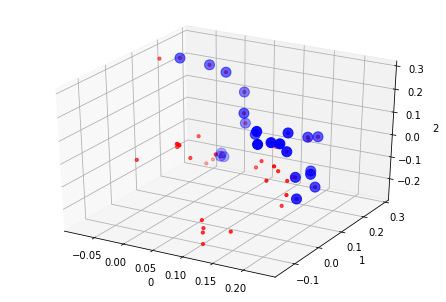

In [60]:
fig = plt.figure()
#crear ejes 3D para la figura
ax = Axes3D(fig)
#poner etiquetas
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')
#dispersion de los puntos
ax.scatter(df1.iloc[:,0],df1.iloc[:,1],df1.iloc[:,2],color='r',s=10) #color rojo tamano 10
ax.scatter(sky1.iloc[:,0],sky1.iloc[:,1],sky1.iloc[:,2],color='b',s=100) # color azul tamano 100
plt.show()

##2. Itemset Mining con el dataset
2.1. Transaccional Dataset

In [61]:
df_siembra = pd.read_excel('https://www.datosabiertos.gob.pe/sites/default/files/Estadisticas%20Intension%20de%20Siembra.xlsx')

In [62]:
df_siembra.rename(columns={'PROVINICA':'PROVINCIA'},inplace=True)
df_siembra

,DEPARTAMENTO,PROVINCIA,DISTRITO,CULTIVO,CAMPANA,AGO,SEP,OCT,NOV,DIC,ENE,FEB,MAR,ABR,MAY,JUN,JUL
0,ANCASH,AIJA,SUCCHA,Papa nativa,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
1,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
2,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
3,ANCASH,ANTONIO RAYMONDI,ACZO,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
4,ANCASH,ANTONIO RAYMONDI,CHINGAS,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,ANCASH,RECUAY,TAPACOCHA,Cebada grano,2020-2021,0,0,0,0,0,4,5,0,0,0,0,0
12177,ANCASH,RECUAY,TAPACOCHA,Haba grano seco,2020-2021,0,0,0,0,0,3,4,0,0,0,0,0
12178,ANCASH,RECUAY,TAPACOCHA,Trigo,2020-2021,0,0,0,0,0,3,5,0,0,0,0,0
12179,ANCASH,SANTA,MACATE,Haba grano seco,2020-2021,0,0,0,0,0,3,2,0,0,0,0,0


In [66]:
df_siembra_t = df_siembra.copy() #crear una copia del df original
df_siembra_t['UBICACION'] = df_siembra_t.DEPARTAMENTO + '-' + df_siembra_t.PROVINCIA + '-' + df_siembra_t.DISTRITO
df_siembra_t

,DEPARTAMENTO,PROVINCIA,DISTRITO,CULTIVO,CAMPANA,AGO,SEP,OCT,NOV,DIC,ENE,FEB,MAR,ABR,MAY,JUN,JUL,UBICACION
0,ANCASH,AIJA,SUCCHA,Papa nativa,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-AIJA-SUCCHA
1,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-LLAMELLIN
2,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-LLAMELLIN
3,ANCASH,ANTONIO RAYMONDI,ACZO,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-ACZO
4,ANCASH,ANTONIO RAYMONDI,CHINGAS,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-CHINGAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,ANCASH,RECUAY,TAPACOCHA,Cebada grano,2020-2021,0,0,0,0,0,4,5,0,0,0,0,0,ANCASH-RECUAY-TAPACOCHA
12177,ANCASH,RECUAY,TAPACOCHA,Haba grano seco,2020-2021,0,0,0,0,0,3,4,0,0,0,0,0,ANCASH-RECUAY-TAPACOCHA
12178,ANCASH,RECUAY,TAPACOCHA,Trigo,2020-2021,0,0,0,0,0,3,5,0,0,0,0,0,ANCASH-RECUAY-TAPACOCHA
12179,ANCASH,SANTA,MACATE,Haba grano seco,2020-2021,0,0,0,0,0,3,2,0,0,0,0,0,ANCASH-SANTA-MACATE


a. (0.5 puntos) transforme este dataset en transaccional por distrito

In [63]:
def to_transactional(df,column_trans,columns_items):
  transactions =[]
  for v in df[column_trans].unique():
    transactions.append(list(df[df[column_trans] == v][columns_items].values))
  return transactions

trans = to_transactional(df_siembra,'DISTRITO','CULTIVO')

print(len(trans))

1400


In [67]:
print('En el distrito ', df_siembra_t.UBICACION.unique()[0],'cultivaran', trans[0])
print('En el distrito ', df_siembra_t.UBICACION.unique()[50],'cultivaran', trans[50])

En el distrito  ANCASH-AIJA-SUCCHA cultivaran ['Papa nativa', 'Olluco', 'Quinua', 'Papa color', 'Papa blanca', 'Frijol grano seco', 'Maiz amilaceo', 'Trigo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco']
En el distrito  ANCASH-ANTONIO RAYMONDI-SAN JUAN DE RONTOY cultivaran ['Arveja grano verde', 'Olluco', 'Quinua', 'Arveja grano seco', 'Haba grano seco', 'Papa blanca', 'Maiz amilaceo', 'Papa nativa', 'Papa color', 'Cebada grano', 'Trigo']


B. (0.5 puntos) transforme este dataset en transaccional por provincia.

In [68]:
trans = to_transactional(df_siembra,'PROVINCIA','CULTIVO')

print(len(trans))

175


In [69]:
print('En la provincia ', df_siembra_t.UBICACION.unique()[0],'cultivaran', trans[0])
print('En la provincia ', df_siembra_t.UBICACION.unique()[50],'cultivaran', trans[50])

En la provincia  ANCASH-AIJA-SUCCHA cultivaran ['Papa nativa', 'Olluco', 'Olluco', 'Papa nativa', 'Papa nativa', 'Olluco', 'Papa nativa', 'Olluco', 'Papa nativa', 'Olluco', 'Maiz amilaceo', 'Maiz amilaceo', 'Papa color', 'Quinua', 'Papa color', 'Quinua', 'Quinua', 'Papa color', 'Quinua', 'Quinua', 'Papa color', 'Papa blanca', 'Papa blanca', 'Papa blanca', 'Papa blanca', 'Frijol grano seco', 'Papa color', 'Frijol grano seco', 'Papa blanca', 'Maiz amilaceo', 'Maiz amarillo duro', 'Haba grano seco', 'Cebada grano', 'Haba grano seco', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco', 'Camote', 'Yuca', 'Frijol grano seco', 'Arveja grano seco', 'Cebada grano', 'Maiz amilaceo', 'Trigo', 'Trigo', 'Trigo', 'Trigo', 'Arveja grano seco', 'Tomate', 'Haba grano seco', 'Maiz amilaceo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco', 'Arveja grano seco', 'Cebada grano', 'Trigo']
En la provincia  ANCASH-ANTONIO RAYMONDI-SAN JUAN DE RONTOY cultivaran ['Olluco', 'Zapallo', 'Olluco', 'Ajo',

c. (0.5 puntos) transforme este dataset en transaccional por departamento.

In [70]:
trans = to_transactional(df_siembra,'DEPARTAMENTO','CULTIVO')

print(len(trans))

23


In [71]:
print('En el departamento ', df_siembra_t.UBICACION.unique()[0],'cultivaran', trans[0])
print('En el departamento ', df_siembra_t.UBICACION.unique()[50],'cultivaran', trans[10])

En el departamento  ANCASH-AIJA-SUCCHA cultivaran ['Papa nativa', 'Olluco', 'Quinua', 'Quinua', 'Olluco', 'Papa color', 'Quinua', 'Frijol grano seco', 'Arveja grano verde', 'Olluco', 'Papa nativa', 'Quinua', 'Haba grano seco', 'Papa color', 'Quinua', 'Arveja grano verde', 'Olluco', 'Papa color', 'Quinua', 'Maiz choclo', 'Olluco', 'Olluco', 'Olluco', 'Haba grano seco', 'Olluco', 'Papa blanca', 'Papa color', 'Haba grano seco', 'Maiz choclo', 'Olluco', 'Papa color', 'Papa nativa', 'Arveja grano seco', 'Haba grano seco', 'Arveja grano seco', 'Haba grano seco', 'Papa blanca', 'Olluco', 'Haba grano seco', 'Papa color', 'Quinua', 'Haba grano seco', 'Olluco', 'Papa nativa', 'Haba grano seco', 'Haba grano seco', 'Papa nativa', 'Papa nativa', 'Olluco', 'Quinua', 'Olluco', 'Quinua', 'Papa color', 'Olluco', 'Papa nativa', 'Papa nativa', 'Olluco', 'Papa nativa', 'Olluco', 'Haba grano seco', 'Olluco', 'Quinua', 'Quinua', 'Haba grano seco', 'Maiz amilaceo', 'Arveja grano seco', 'Papa color', 'Olluco'

##2.2. Emerging Patterns

a. (0.5 puntos) divida el dataset en 2 clases según región (Puno vs resto del páis)

In [72]:
df_siembra_puno = df_siembra[df_siembra.DEPARTAMENTO == 'PUNO']
df_siembra_puno['UBICACION'] = df_siembra_puno.DEPARTAMENTO + '-' + df_siembra_puno.PROVINCIA + '-' + df_siembra_puno.DISTRITO
trans_puno = to_transactional(df_siembra_puno, 'UBICACION', 'CULTIVO')
print(len(trans_puno))
df_siembra_puno

103


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DEPARTAMENTO,PROVINCIA,DISTRITO,CULTIVO,CAMPANA,AGO,SEP,OCT,NOV,DIC,ENE,FEB,MAR,ABR,MAY,JUN,JUL,UBICACION
59,PUNO,AZANGARO,CHUPA,Trigo,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,PUNO-AZANGARO-CHUPA
60,PUNO,CHUCUITO,DESAGUADERO,Cebolla cabeza roja,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,PUNO-CHUCUITO-DESAGUADERO
61,PUNO,MOHO,HUAYRAPATA,Cebolla cabeza roja,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,PUNO-MOHO-HUAYRAPATA
62,PUNO,YUNGUYO,YUNGUYO,Zanahoria,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,PUNO-YUNGUYO-YUNGUYO
63,PUNO,YUNGUYO,ANAPIA,Cebolla cabeza roja,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,PUNO-YUNGUYO-ANAPIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,PUNO,CARABAYA,OLLACHEA,Papa nativa,2020-2021,400,430,0,0,0,0,0,0,0,0,110,160,PUNO-CARABAYA-OLLACHEA
5869,PUNO,SANDIA,LIMBANI,Papa nativa,2020-2021,150,250,0,0,0,0,0,0,0,0,110,80,PUNO-SANDIA-LIMBANI
8458,PUNO,CHUCUITO,POMATA,Quinua,2020-2021,0,310,550,0,95,5,0,0,0,0,0,0,PUNO-CHUCUITO-POMATA
8656,PUNO,AZANGARO,SAN ANTON,Papa nativa,2020-2021,0,0,280,225,85,10,0,0,0,0,0,0,PUNO-AZANGARO-SAN ANTON


b. de Puno al resto del país:

a.(0.5 puntos) extraiga los itemsets emergentes usando el growth-rate que aparezcan al menos 1 vez en la data de Puno al resto

In [74]:
r = fpgrowth(trans,target='c',supp=10,zmin=1)
df = pd.DataFrame(r)
df.columns =['Itemset', 'Freq']
df.sort_values(by='Freq',ascending=False,inplace=True)
df

,Itemset,Freq
391,"(Zapallo,)",22
390,"(Maiz amarillo duro,)",22
389,"(Maiz amarillo duro, Zapallo)",21
388,"(Frijol grano seco, Maiz amarillo duro)",21
386,"(Yuca, Maiz amarillo duro)",21
...,...,...
1,"(Cebolla cabeza blanca o amarilla, Algodon, Aj...",3
14,"(Algodon, Paprika, Arroz cascara, Ajo, Quinua,...",3
3,"(Cebolla cabeza blanca o amarilla, Algodon, Qu...",3
2,"(Cebolla cabeza blanca o amarilla, Algodon, Qu...",3
